# Geocoding Closed Mobile Home Parks (MHPs)

## Importing Libraries

In [40]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import pandas as pd

In [41]:
closed_mhps = pd.read_csv('data/closed_111521.csv')

In [42]:
closed_mhps.shape

(96, 13)

In [43]:
closed_mhps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Park Name           96 non-null     object 
 1   County              96 non-null     object 
 2   Park Identifier     96 non-null     object 
 3   Park Address        96 non-null     object 
 4   city                96 non-null     object 
 5   zipcode             96 non-null     int64  
 6   phone number        80 non-null     object 
 7   Fire Authority      96 non-null     object 
 8   Jurisdiction        96 non-null     object 
 9   MH Spaces           83 non-null     float64
 10  RV Lots W/Drains    83 non-null     float64
 11  RV Lots W/O Drains  83 non-null     float64
 12  Operated by         80 non-null     object 
dtypes: float64(3), int64(1), object(9)
memory usage: 9.9+ KB


In [44]:
closed_mhps.head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA..."
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N..."
2,AVALON TP,LOS ANGELES,19-0047-MP,"1832 N DURFEE, S EL MONTE , 91733",S EL MONTE,91733,(805) 944-5916,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,0.0,0.0,"GRIEGORIAN, L, 3855 LEMON AVE E140, WALNUT, CA..."
3,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C..."
4,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706"


In [45]:
closed_mhps.tail()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by
91,EAST SHORE RV PARK,LOS ANGELES,19-1511-MP,"1440 CAMPER VIEW RD, SAN DIMAS , 91773",SAN DIMAS,91773,(909) 599-8355,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",0.0,519.0,25.0,"COOK, PHYLLIS, 1440 CAMPER VIEW RD, SAN DIMAS,..."
92,VALENCIA MHP,LOS ANGELES,19-1526-MP,"350 W ROUTE 66, GLENDORA , 91740",GLENDORA,91740,(818) 963-5887,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,14.0,0.0,"ROUTE 66 INVESTMENTS,LLC, 915-C W. FOOTHILL BL..."
93,WALNUT LODGE CT,LOS ANGELES,19-1535-MP,"9515 WHITTIER BLVD, PICO RIVERA , 90660",PICO RIVERA,90660,(562) 695-7700,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34.0,0.0,0.0,"KAHALA PROPERTIES INC, PO BOX 2842, LAGUNA HIL..."
94,AVOLON CARSON MH/RV PARK,LOS ANGELES,19-1565-MP,"616 E CARSON ST, CARSON , 90745",CARSON,90745,(310) 834-3175,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",67.0,108.0,0.0,"WONG, DARRYL, 802 N VERMONT AVE #109, LOS ANGE..."
95,AZUSA SPRINGS PARTNERS,LOS ANGELES,19-1577-MP,"100 OLD SAN GABRIEL CANYON RD, AZUSA , 91702",AZUSA,91702,(818) 368-0933,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"WATERSHED CONSERVATION AUTHORITY, 900 S. FREMO..."


In [46]:
closed_mhps['lat'] = pd.Series(dtype='float')
closed_mhps['lon'] = pd.Series(dtype='float')

In [47]:
closed_mhps.head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",NaN,NaN
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",NaN,NaN
2,AVALON TP,LOS ANGELES,19-0047-MP,"1832 N DURFEE, S EL MONTE , 91733",S EL MONTE,91733,(805) 944-5916,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,0.0,0.0,"GRIEGORIAN, L, 3855 LEMON AVE E140, WALNUT, CA...",NaN,NaN
3,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",NaN,NaN
4,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",NaN,NaN


### Here we see that the empty lat/lon columns have been added to my dataframe. It is now ready to go for geocoding!

## Looping and Geocoding

In [48]:
closed_mhps['Park Address']

0                  2920 ALLGEYER,  EL MONTE , 91733
1              1240 NADEAU ST,  LOS ANGELES , 90001
2                1832 N DURFEE,  S EL MONTE , 91733
3           13651 GARVEY AVE,  BALDWIN PARK , 91706
4          8827 E ARTESIA BLVD,  BELLFLOWER , 90706
                          ...                      
91          1440 CAMPER VIEW RD,  SAN DIMAS , 91773
92                350 W ROUTE 66,  GLENDORA , 91740
93         9515 WHITTIER BLVD,  PICO RIVERA , 90660
94                 616 E CARSON ST,  CARSON , 90745
95    100 OLD SAN GABRIEL CANYON RD,  AZUSA , 91702
Name: Park Address, Length: 96, dtype: object

In [49]:
locations = gpd.tools.geocode(closed_mhps['Park Address'], provider='photon')

<AxesSubplot:>

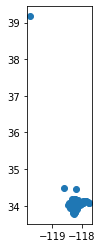

In [50]:
locations.plot()

In [51]:
for index, row in closed_mhps.iterrows():

    address = row['Park Address']
    
    try:
        
        geocoded_address = ox.geocoder.geocode(address)

        closed_mhps.at[index,'lat']=geocoded_address[0]
        closed_mhps.at[index,'lon']=geocoded_address[1]

        print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))        

    except:
        print('Could not geocode '+ address)
        pass

2920 ALLGEYER,  EL MONTE , 91733 geocoded to 34.059779932025556 -118.01855878821141
1240 NADEAU ST,  LOS ANGELES , 90001 geocoded to 33.96738508333333 -118.25382472222223
Could not geocode 1832 N DURFEE,  S EL MONTE , 91733
13651 GARVEY AVE,  BALDWIN PARK , 91706 geocoded to 34.0696743 -117.9714673
8827 E ARTESIA BLVD,  BELLFLOWER , 90706 geocoded to 33.8746614 -118.1514418
4432 MANHATTAN BEACH BLVD,  LAWNDALE , 90260 geocoded to 33.88724724 -118.35342444
3005 BIG DALTON,  BALDWIN PARK , 91706 geocoded to 34.069944500000005 -117.9665395
11013 PRAIRIE,  INGLEWOOD , 90305 geocoded to 33.9354756 -118.3439986
Could not geocode 5614 CLARA AVE,  BELL GARDENS , 90201
4309 CARLIN AVE,  LYNWOOD , 90262 geocoded to 33.91108006122449 -118.19410071428572
Could not geocode 44647 1/2 SIERRA HWY ,  LANCASTER , 93534
Could not geocode 14353 E GARVEY AVE,  BALDWIN PARK , 91706
1437 E HUNTINGTON DR,  DUARTE , 91008 geocoded to 34.13977220408163 -117.97493718367348
3930 W CENTURY BLVD,  INGLEWOOD , 90304

### The above command already identified the addresses that were not geocoded, but I want to get a better sense of how many locations were actually geocoded so I can ~exclusively~ work with those.

In [52]:
closed_mhps

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",34.059780,-118.018559
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",33.967385,-118.253825
2,AVALON TP,LOS ANGELES,19-0047-MP,"1832 N DURFEE, S EL MONTE , 91733",S EL MONTE,91733,(805) 944-5916,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,0.0,0.0,"GRIEGORIAN, L, 3855 LEMON AVE E140, WALNUT, CA...",NaN,NaN
3,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",34.069674,-117.971467
4,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",33.874661,-118.151442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,EAST SHORE RV PARK,LOS ANGELES,19-1511-MP,"1440 CAMPER VIEW RD, SAN DIMAS , 91773",SAN DIMAS,91773,(909) 599-8355,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",0.0,519.0,25.0,"COOK, PHYLLIS, 1440 CAMPER VIEW RD, SAN DIMAS,...",34.087687,-117.793379
92,VALENCIA MHP,LOS ANGELES,19-1526-MP,"350 W ROUTE 66, GLENDORA , 91740",GLENDORA,91740,(818) 963-5887,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,14.0,0.0,"ROUTE 66 INVESTMENTS,LLC, 915-C W. FOOTHILL BL...",NaN,NaN
93,WALNUT LODGE CT,LOS ANGELES,19-1535-MP,"9515 WHITTIER BLVD, PICO RIVERA , 90660",PICO RIVERA,90660,(562) 695-7700,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34.0,0.0,0.0,"KAHALA PROPERTIES INC, PO BOX 2842, LAGUNA HIL...",33.997147,-118.074009
94,AVOLON CARSON MH/RV PARK,LOS ANGELES,19-1565-MP,"616 E CARSON ST, CARSON , 90745",CARSON,90745,(310) 834-3175,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",67.0,108.0,0.0,"WONG, DARRYL, 802 N VERMONT AVE #109, LOS ANGE...",33.831502,-118.265310


In [53]:
geocoded_closedmhps = closed_mhps[closed_mhps.lat.notnull()]

In [54]:
geocoded_closedmhps

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",34.059780,-118.018559
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",33.967385,-118.253825
3,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",34.069674,-117.971467
4,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",33.874661,-118.151442
5,BLUE BONNET TP,LOS ANGELES,19-0068-MP,"4432 MANHATTAN BEACH BLVD, LAWNDALE , 90260",LAWNDALE,90260,(310) 545-7498,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,0.0,"LAWNDALE REDEVELOPMENT AGENCY, 14717 BURIN AVE...",33.887247,-118.353424
6,VAGABOND HAVEN TP,LOS ANGELES,19-0104-MP,"3005 BIG DALTON, BALDWIN PARK , 91706",BALDWIN PARK,91706,(818) 284-0958,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,0.0,0.0,"DEGREVE, MAURICE, MARIE DEGREVE 1828 S VEGA ST...",34.069945,-117.966539
7,HOLIDAY TRAILER,LOS ANGELES,19-0114-MP,"11013 PRAIRIE, INGLEWOOD , 90305",INGLEWOOD,90305,(310) 671-8405,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",NaN,NaN,NaN,NaN,33.935476,-118.343999
9,ASHLEYS TP,LOS ANGELES,19-0155-MP,"4309 CARLIN AVE, LYNWOOD , 90262",LYNWOOD,90262,(805) 944-3434,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","LYNWOOD BUILDING DEPARTMENT, MOBILEHOME PARKS ...",22.0,0.0,0.0,"CARLIN AVENUE VILLAGE, LLC, 3300 IRVINE AVENUE...",33.911080,-118.194101
12,DUARTE TRAILER CT,LOS ANGELES,19-0177-MP,"1437 E HUNTINGTON DR, DUARTE , 91008",DUARTE,91008,(818) 858-9044,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",28.0,0.0,0.0,"OATMAN, MICHELLE, 6537 COUNTRY CLUB DR, LA VER...",34.139772,-117.974937
13,CENTURY TRAILER PARK,LOS ANGELES,19-0186-MP,"3930 W CENTURY BLVD, INGLEWOOD , 90304",INGLEWOOD,90304,(310) 673-5093,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",24.0,0.0,0.0,"CITY OF INGLEWOOD, ONE MANCHESTER BLVD, INGLEW...",33.945364,-118.361441


In [55]:
geocoded_closedmhps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 95
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Park Name           59 non-null     object 
 1   County              59 non-null     object 
 2   Park Identifier     59 non-null     object 
 3   Park Address        59 non-null     object 
 4   city                59 non-null     object 
 5   zipcode             59 non-null     int64  
 6   phone number        49 non-null     object 
 7   Fire Authority      59 non-null     object 
 8   Jurisdiction        59 non-null     object 
 9   MH Spaces           51 non-null     float64
 10  RV Lots W/Drains    51 non-null     float64
 11  RV Lots W/O Drains  51 non-null     float64
 12  Operated by         50 non-null     object 
 13  lat                 59 non-null     float64
 14  lon                 59 non-null     float64
dtypes: float64(5), int64(1), object(9)
memory usage: 7.4+ KB


### So it seems that we've lost a little under half of our original mhp locations (which may not necessarily be a bad thing). Now I have the closed mhps I want to dig deeper on.

In [56]:
geocoded_closedmhps.head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",34.059780,-118.018559
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",33.967385,-118.253825
3,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",34.069674,-117.971467
4,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",33.874661,-118.151442
5,BLUE BONNET TP,LOS ANGELES,19-0068-MP,"4432 MANHATTAN BEACH BLVD, LAWNDALE , 90260",LAWNDALE,90260,(310) 545-7498,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,0.0,"LAWNDALE REDEVELOPMENT AGENCY, 14717 BURIN AVE...",33.887247,-118.353424


In [57]:
geocoded_closedmhps.tail()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
89,VILLA CAPRI MHP,LOS ANGELES,19-1509-MP,"3427 BALDWIN PARK BLVD, BALDWIN PARK , 91706",BALDWIN PARK,91706,(818) 960-9972,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",13.0,0.0,0.0,"MAMONE, CLOVER, 2014 SOUTH VINE AVE., ONTARIO,...",34.086442,-117.964919
91,EAST SHORE RV PARK,LOS ANGELES,19-1511-MP,"1440 CAMPER VIEW RD, SAN DIMAS , 91773",SAN DIMAS,91773,(909) 599-8355,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",0.0,519.0,25.0,"COOK, PHYLLIS, 1440 CAMPER VIEW RD, SAN DIMAS,...",34.087687,-117.793379
93,WALNUT LODGE CT,LOS ANGELES,19-1535-MP,"9515 WHITTIER BLVD, PICO RIVERA , 90660",PICO RIVERA,90660,(562) 695-7700,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34.0,0.0,0.0,"KAHALA PROPERTIES INC, PO BOX 2842, LAGUNA HIL...",33.997147,-118.074009
94,AVOLON CARSON MH/RV PARK,LOS ANGELES,19-1565-MP,"616 E CARSON ST, CARSON , 90745",CARSON,90745,(310) 834-3175,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",67.0,108.0,0.0,"WONG, DARRYL, 802 N VERMONT AVE #109, LOS ANGE...",33.831502,-118.265310
95,AZUSA SPRINGS PARTNERS,LOS ANGELES,19-1577-MP,"100 OLD SAN GABRIEL CANYON RD, AZUSA , 91702",AZUSA,91702,(818) 368-0933,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"WATERSHED CONSERVATION AUTHORITY, 900 S. FREMO...",34.161821,-117.893382


### I really want to see the cities where the closed mhps are (and this is what I want to be able to map with these now geocoded addresses. Let's get a *sneak peek*

In [61]:
geocoded_closed_locations = gpd.tools.geocode(geocoded_closedmhps['city'], provider='photon')

<AxesSubplot:>

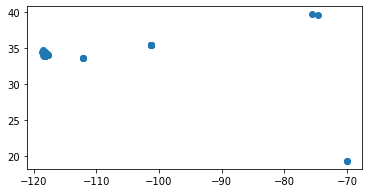

In [62]:
geocoded_closed_locations.plot()

### Obviously, not very detailed or completely legible, but we're gonna work on that

## Converting to a geodataframe

In [63]:
geocoded_closedmhps = gpd.GeoDataFrame(geocoded_closedmhps, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(geocoded_closedmhps.lon, geocoded_closedmhps.lat))

## Let's map it!

### Let's make it a little *prettier* and add a base layer

In [64]:
geocoded_closedmhps = geocoded_closedmhps.to_crs(epsg=3857)

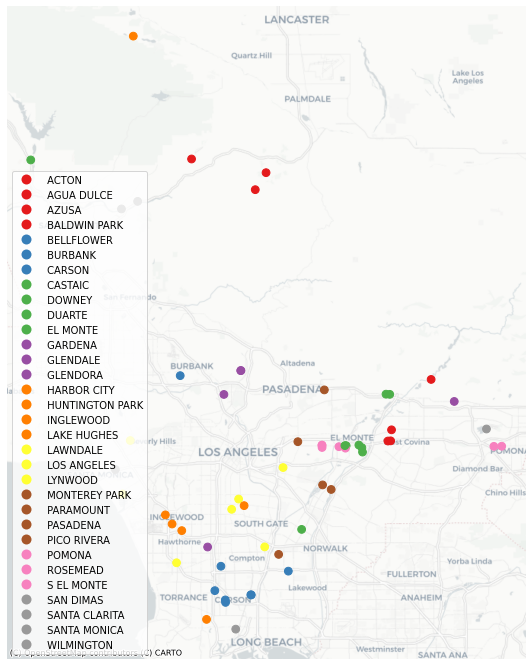

In [65]:
ax = geocoded_closedmhps.plot(figsize=(12,12),
                              column='city',
                              legend=True,
                              cmap='Set1',
                             markersize=60)

ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## What's next? 
### This is a long list of of cities. While it is helpful to know which cities closed mhps were in, we really want to focus on the cities with the highest concentration of closed mhps, which is something we will continue filtering out

### To use the mostly geocoded data, and see if I can manually geocode the few addresses that weren't already geocoded, I'm going to export the new datatframe as a csv. The purpose of exporting is also to save the geocoded addresses for closed mphs as a separate file from the orignal data. I also want to separately save the not-geocoded addresses in case I want to go back and explore those later.

In [66]:
notgeocoded_closedmhps = closed_mhps[closed_mhps.lat.isnull()]

In [68]:
notgeocoded_closedmhps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 2 to 92
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Park Name           37 non-null     object 
 1   County              37 non-null     object 
 2   Park Identifier     37 non-null     object 
 3   Park Address        37 non-null     object 
 4   city                37 non-null     object 
 5   zipcode             37 non-null     int64  
 6   phone number        31 non-null     object 
 7   Fire Authority      37 non-null     object 
 8   Jurisdiction        37 non-null     object 
 9   MH Spaces           32 non-null     float64
 10  RV Lots W/Drains    32 non-null     float64
 11  RV Lots W/O Drains  32 non-null     float64
 12  Operated by         30 non-null     object 
 13  lat                 0 non-null      float64
 14  lon                 0 non-null      float64
dtypes: float64(5), int64(1), object(9)
memory usage: 4.6+ KB


In [69]:
notgeocoded_closedmhps

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
2,AVALON TP,LOS ANGELES,19-0047-MP,"1832 N DURFEE, S EL MONTE , 91733",S EL MONTE,91733,(805) 944-5916,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,0.0,0.0,"GRIEGORIAN, L, 3855 LEMON AVE E140, WALNUT, CA...",NaN,NaN
8,CLARA TRAILER CT,LOS ANGELES,19-0119-MP,"5614 CLARA AVE, BELL GARDENS , 90201",BELL GARDENS,90201,(213) 722-1061,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",19.0,0.0,0.0,"VARTANIAN, SOOKIE, 620 N 19TH ST, MONTEBELLO, ...",NaN,NaN
10,MOCHEL TP,LOS ANGELES,19-0156-MP,"44647 1/2 SIERRA HWY , LANCASTER , 93534",LANCASTER,93534,(805) 944-3434,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",18.0,0.0,0.0,"MOCHEL FAMILY TRUST, 45508 KINGTREE, LANCASTER...",NaN,NaN
11,DREAMLAND AUTO CT\TP,LOS ANGELES,19-0175-MP,"14353 E GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(818) 858-9044,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"SONI, JASPAL, 16138 ELZA DR, HACIENDA HEIGHTS,...",NaN,NaN
14,FRIENDLY TP,LOS ANGELES,19-0233-MP,"1226 W IMPERIAL HWY, LOS ANGELES , 90044",LOS ANGELES,90044,(310) 547-1374,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",40.0,0.0,0.0,"PUENTE, PATRICIA, PO BOX 2656, SAN PEDRO, CA 9...",NaN,NaN
15,GARVEY TRAILER CT,LOS ANGELES,19-0245-MP,"8353 E GARVEY, ROSEMEAD , 91770",ROSEMEAD,91770,NaN,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",6.0,0.0,0.0,"WANG, JAMES, 8399 E GARVEY AVE, ROSEMEAD, CA 9...",NaN,NaN
16,GREELEY MOBILE LODGE,LOS ANGELES,19-0265-MP,"8111 E GARVEY, ROSEMEAD , 91770",ROSEMEAD,91770,NaN,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,12.0,0.0,"CB & A INVESTMENTS, LLC, 227 W VALLEY BLVD #30...",NaN,NaN
18,HARMONY LANE TRAILER CT,LOS ANGELES,19-0279-MP,"7533 E GARVEY, ROSEMEAD , 91770",ROSEMEAD,91770,NaN,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",33.0,0.0,0.0,"YOUNG, C, 543 PROSPECT ST., SAN CARLOS, CA 94070",NaN,NaN
22,IMPERIAL TP,LOS ANGELES,19-0316-MP,"3670 W IMPERIAL HWY, HAWTHORNE , 90250",HAWTHORNE,90250,(818) 280-3480,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",58.0,0.0,0.0,"MENLO, SAM, 4221 WILSHIRE BLVD SUITE # 210, LO...",NaN,NaN
23,LA TP,LOS ANGELES,19-0379-MP,"2121 27 E NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 581-7124,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",1.0,0.0,29.0,"JACOBS, LILLIAN, 7831 SOUTH ALAMEDA, LOS ANGEL...",NaN,NaN


### Exporting my notgeocoded data as a csv

In [70]:
notgeocoded_closedmhps.to_csv("closedmhps_notgeocoded.csv")

### Exporting my *geocoded* data as a csv and as a geojson file for good measure

In [71]:
geocoded_closedmhps.to_csv("closedmhps_geocoded.csv")

In [72]:
geocoded_closedmhps.to_file("closedmhps_geocoded.geojson", driver = 'GeoJSON')